In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm
from pathlib import Path
#import seaborn as sns
import pandas as pd
import numpy as np
import itertools

In [19]:
folder = Path("results_synced/atlas_ratio/")
datasets = ["GunPoint", "Coffee"]
encoders = ["CNN_DFS"]
folds = 5

dfs = []
for dataset, encoder in itertools.product(datasets, encoders):
    paths = [folder /  f"EXP_ratio_{encoder}_{dataset}_f{f}.csv" for f in range(folds)]
    paths = [p for p in paths if p.exists()] 
    dfs.append(pd.concat([pd.read_csv(p) for p in paths]))
df = pd.concat(dfs, ignore_index=True)
df

,dataset,arch,pretrained,fold_number,random_state,batch_size,window_size,target_val_acc,target_val_f1,target_val_auroc,...,target_nepochs,nsamp_tra,nsamp_pre,nsamp_test,pretrain_val_acc,pretrain_val_f1,pretrain_val_auroc,pretrain_best_model,pretrain_train_csv,pretrain_nepochs
0,GunPoint,CNN_DFS,False,0,0,128,5,0.550351,0.550351,0.566328,...,55,1227,0,5985,NaN,NaN,NaN,NaN,NaN,NaN
1,GunPoint,CNN_DFS,True,0,0,128,5,0.529274,0.529274,0.545868,...,73,1227,3627,5985,0.470253,0.470253,0.788140,training/exp/EXP_ratio_f0.0_2023-02-21_15-58/l...,training/exp/EXP_ratio_f0.0_2023-02-21_15-58/l...,10.0
2,GunPoint,CNN_DFS,True,0,0,128,5,0.538642,0.538642,0.555048,...,53,1227,7254,5985,0.495110,0.495110,0.798916,training/exp/EXP_ratio_f0.0_2023-02-21_16-08/l...,training/exp/EXP_ratio_f0.0_2023-02-21_16-08/l...,7.0
3,GunPoint,CNN_DFS,True,0,0,128,5,0.536300,0.536300,0.607851,...,58,1227,10881,5985,0.465091,0.465091,0.797641,training/exp/EXP_ratio_f0.0_2023-02-21_16-15/l...,training/exp/EXP_ratio_f0.0_2023-02-21_16-15/l...,8.0
4,GunPoint,CNN_DFS,True,0,0,128,5,0.524590,0.524590,0.552457,...,66,1227,14508,5985,0.452119,0.452119,0.776359,training/exp/EXP_ratio_f0.0_2023-02-21_16-23/l...,training/exp/EXP_ratio_f0.0_2023-02-21_16-23/l...,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,Coffee,CNN_DFS,True,3,0,128,5,0.511364,0.511364,0.505902,...,41,3417,7995,3131,0.527758,0.527758,0.811263,training/exp/EXP_ratio_f3.4_2023-02-23_13-05/l...,training/exp/EXP_ratio_f3.4_2023-02-23_13-05/l...,15.0
269,Coffee,CNN_DFS,True,3,0,128,5,0.489394,0.489394,0.478271,...,44,3417,9995,3131,0.543980,0.543980,0.798208,training/exp/EXP_ratio_f3.4_2023-02-23_13-14/l...,training/exp/EXP_ratio_f3.4_2023-02-23_13-14/l...,12.0
270,Coffee,CNN_DFS,False,4,0,128,5,0.643939,0.643939,0.508232,...,111,683,0,3131,NaN,NaN,NaN,NaN,NaN,NaN
271,Coffee,CNN_DFS,True,4,0,128,5,0.590909,0.590909,0.590651,...,41,683,1998,3131,0.480057,0.480057,0.779973,training/exp/EXP_ratio_f4.0_2023-02-23_13-38/l...,training/exp/EXP_ratio_f4.0_2023-02-23_13-38/l...,15.0


In [36]:
ds = "GunPoint"
df = df[df["dataset"] == ds]
df[df["nsamp_tra"] == 6135].groupby("nsamp_pre")["pretrain_nepochs"].mean()

nsamp_pre
0         NaN
3627     12.0
7254     11.4
10881     7.2
14508     8.6
18135     8.8
Name: pretrain_nepochs, dtype: float64

In [16]:
cols = [c for c in df.columns if ("target_test" in c)]
xd1 = df.groupby(["nsamp_tra", "nsamp_pre"])[cols].mean()
xd2 = df.groupby(["nsamp_tra", "nsamp_pre"])[cols].std()
xd1.columns = [c + "_mean" for c in xd1.columns]
xd2.columns = [c + "_std" for c in xd2.columns]
xd = pd.concat([xd1, xd2], axis=1).reset_index()
xd

,nsamp_tra,nsamp_pre,target_test_acc_mean,target_test_f1_mean,target_test_auroc_mean,target_test_acc_std,target_test_f1_std,target_test_auroc_std
0,683,0,0.510195,0.510195,0.501622,0.013687,0.013687,0.002235
1,683,1941,0.499854,0.499854,0.502108,NaN,NaN,NaN
2,683,1998,0.501677,0.501677,0.502544,0.011713,0.011713,0.007126
3,683,3882,0.498098,0.498098,0.498623,NaN,NaN,NaN
4,683,3997,0.491776,0.491776,0.505195,0.013743,0.013743,0.007612
5,683,5825,0.487270,0.487270,0.499191,NaN,NaN,NaN
6,683,5996,0.508144,0.508144,0.502032,0.018713,0.018713,0.000372
7,683,7766,0.519169,0.519169,0.500790,NaN,NaN,NaN
8,683,7995,0.507506,0.507506,0.504288,0.017268,0.017268,0.004911
9,683,9709,0.501902,0.501902,0.499516,NaN,NaN,NaN


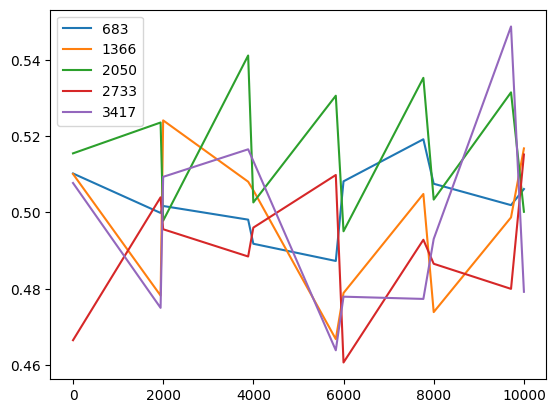

In [18]:
df: pd.DataFrame = xd

metric = "f1"

fig, ax = plt.subplots()#plt.subplots(subplot_kw={"projection": "3d"})
for i, dfg in df.groupby(df["nsamp_tra"]):
    ax.errorbar(dfg["nsamp_pre"], dfg[f"target_test_{metric}_mean"], label=dfg["nsamp_tra"].unique()[0])
plt.legend()


In [62]:
df: pd.DataFrame = dfs["ratio"]
cols = [c for c in df.columns if ("target_test" in c) and ("nepochs" not in c)]
print(df.groupby("nframes_pre")["dataset"].count())
xd = df.groupby("nframes_pre")[cols].mean(numeric_only=True)
xd.set_index(pd.Series(name="ratio pretrain/train", data=[0,1,2,3], dtype=int), inplace=True)
xd

nframes_pre
0        5
6045     5
12090    5
18135    5
Name: dataset, dtype: int64


,target_test_acc,target_test_f1,target_test_auroc
ratio pretrain/train,,,
0,0.607218,0.607218,0.657215
1,0.662657,0.662657,0.712628
2,0.674486,0.674486,0.726777
3,0.656140,0.656140,0.702950


<AxesSubplot: xlabel='ratio pretrain/train'>

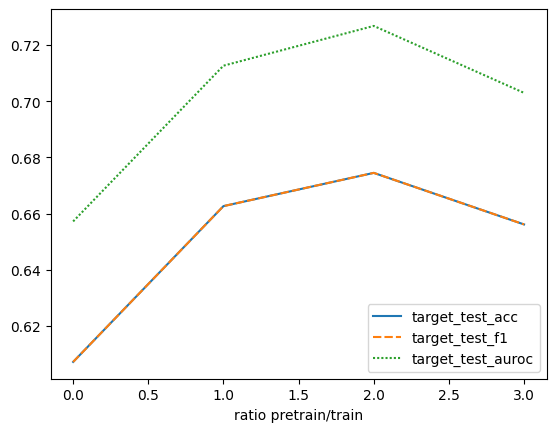

In [60]:
sns.lineplot(xd)

In [53]:
df = pd.read_csv("results/results.csv")
df["lab_shifts"] = df["lab_shifts"].str.slice(start=1,stop=-1).astype("category")
df

,dataset,fold_number,decoder,seed_sts,seed_label,batch_size,window_size,lab_shifts,nframes_tra,nframes_pre,...,aux_nepochs,pre_val_acc,pre_val_f1,pre_val_auroc,pre_test_acc,pre_test_f1,pre_test_auroc,pre_best_model,pre_train_csv,pre_nepochs
0,GunPoint,0,CNN,0,0,128,5,0,10000,40000,...,9,0.838825,0.838825,0.852924,0.646570,0.646570,0.714243,training/auto/0_0_2023-02-01_11-26/logs/pre/ch...,training/auto/0_0_2023-02-01_11-26/logs/pre/me...,122
1,GunPoint,0,CNN,0,0,128,5,0,10000,40000,...,6,0.841496,0.841496,0.857805,0.636455,0.636455,0.712427,training/auto/0_1_2023-02-01_11-37/logs/pre/ch...,training/auto/0_1_2023-02-01_11-37/logs/pre/me...,96
2,GunPoint,0,CNN,0,0,128,5,0.15,10000,40000,...,15,0.840012,0.840012,0.856416,0.637757,0.637757,0.714550,training/auto/0_2_2023-02-01_11-48/logs/pre/ch...,training/auto/0_2_2023-02-01_11-48/logs/pre/me...,100
3,GunPoint,0,CNN,0,0,128,5,0.15,10000,40000,...,7,0.831998,0.831998,0.852894,0.637957,0.637957,0.705994,training/auto/0_3_2023-02-01_11-59/logs/pre/ch...,training/auto/0_3_2023-02-01_11-59/logs/pre/me...,74


In [54]:
df.groupby("lab_shifts")[["def_test_f1", "pre_test_f1"]].mean()

,def_test_f1,pre_test_f1
lab_shifts,,
0,0.635103,0.641512
0.15,0.625538,0.637857


0.6320480704307556 0.6465698480606079


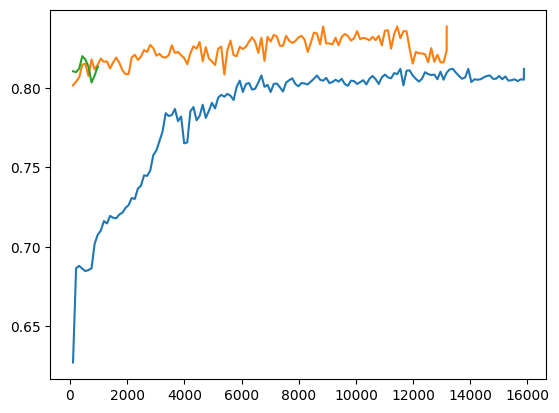

In [21]:
df_def = pd.read_csv("training/auto/0_0_2023-02-01_11-26/logs/def/metrics.csv")
df_aux = pd.read_csv("training/auto/0_0_2023-02-01_11-26/logs/aux/metrics.csv")
df_pre = pd.read_csv("training/auto/0_0_2023-02-01_11-26/logs/pre/metrics.csv")
df_def["val_f1"].dropna().plot()
df_pre["val_f1"].dropna().plot()
df_aux["val_f1"].dropna().plot()
print(df_def["test_f1"].max(), df_pre["test_f1"].max())

0.6381572484970093 0.636454701423645


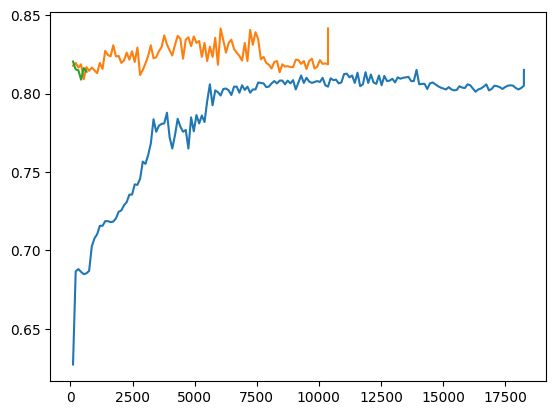

In [23]:
df_def = pd.read_csv("training/auto/0_1_2023-02-01_11-37/logs/def/metrics.csv")
df_aux = pd.read_csv("training/auto/0_1_2023-02-01_11-37/logs/aux/metrics.csv")
df_pre = pd.read_csv("training/auto/0_1_2023-02-01_11-37/logs/pre/metrics.csv")
df_def["val_f1"].dropna().plot()
df_pre["val_f1"].dropna().plot()
df_aux["val_f1"].dropna().plot()
print(df_def["test_f1"].max(), df_pre["test_f1"].max())